In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
from keras.models import Sequential

In [2]:
#----Importación del dataset a GoogleColab
#from google.colab import files
#uploaded = files.upload()

In [1]:
#----Descomprimir el archivo Zip del dataset

#import zipfile

# Especifica el nombre del archivo ZIP
#archivo_zip = "/content/CarneDataset.zip"

# Abre el archivo ZIP
#with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    # Extrae todos los archivos
#    zip_ref.extractall()
#    print("Archivo ZIP descomprimido exitosamente.")

In [5]:
#imágenes que servirán de entrenamiento
train_dataSource = tf.keras.utils.image_dataset_from_directory(
    'C:\carne/train',
    validation_split=0.2, #% de muestas para valicacion
    subset="training",
    seed=123,
    image_size=(300,300)
)

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [6]:
class_names=train_dataSource.class_names #definimos nombres de las categorías
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


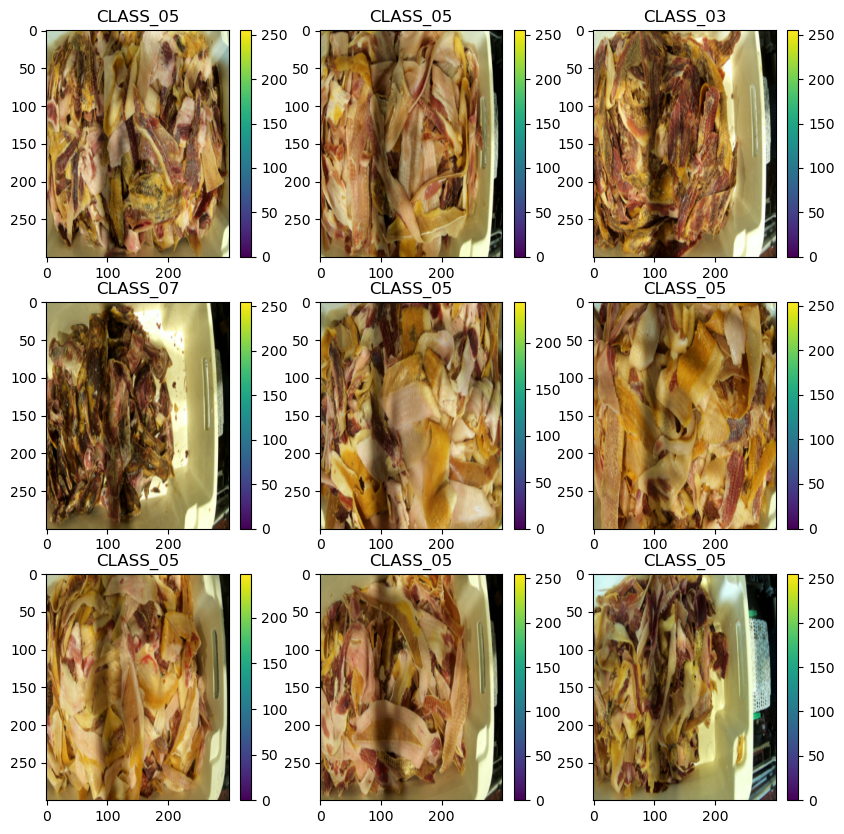

In [44]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
for images,labels in train_dataSource.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.title(class_names[labels[i]])
    plt.axis("auto")



In [8]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.convolutional.conv2d_transpose import Conv2D
num_clases=len(class_names)

modelo=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255,input_shape=(300,300,3)),
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_clases)
])

In [9]:
modelo.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [11]:
epochs=20
history=modelo.fit(
    train_dataSource,
    epochs=epochs
)

Epoch 1/20
41/41 [==============================] - 19s 455ms/step - loss: 1.8465 - accuracy: 0.5379
Epoch 2/20
41/41 [==============================] - 20s 474ms/step - loss: 0.9050 - accuracy: 0.6787
Epoch 3/20
41/41 [==============================] - 20s 484ms/step - loss: 0.5835 - accuracy: 0.7819
Epoch 4/20
41/41 [==============================] - 20s 486ms/step - loss: 0.3835 - accuracy: 0.8646
Epoch 5/20
41/41 [==============================] - 20s 493ms/step - loss: 0.2471 - accuracy: 0.9243
Epoch 6/20
41/41 [==============================] - 20s 496ms/step - loss: 0.0998 - accuracy: 0.9748
Epoch 7/20
41/41 [==============================] - 21s 515ms/step - loss: 0.0545 - accuracy: 0.9870
Epoch 8/20
41/41 [==============================] - 23s 563ms/step - loss: 0.0320 - accuracy: 0.9954
Epoch 9/20
41/41 [==============================] - 24s 569ms/step - loss: 0.0201 - accuracy: 0.9969
Epoch 10/20
41/41 [==============================] - 21s 509ms/step - loss: 0.0050 - accura

In [12]:
test_dataSource=tf.keras.utils.image_dataset_from_directory(
    'C:\carne/test',
    seed=123,
    image_size=(300,300)
)

Found 811 files belonging to 8 classes.


In [24]:
modelo.evaluate(test_dataSource,return_dict=True)
modelo.save("modelo.h5py")

26/26 [==============================] - 3s 98ms/step - loss: 0.7981 - accuracy: 0.8594


INFO:tensorflow:Assets written to: modelo.h5py\assets


In [16]:
image_path='C:\carne/test/CLASS_01/14-CAPTURE_20220523_141530_080.png'
image=tf.keras.preprocessing.image.load_img(image_path).resize((300,300))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
predicciones=modelo.predict(input_arr)


#tomar cualquier imagen del set de pruebas para ver su prediccion
image=test_dataSource[10]
image=np.array([imagen])
prediccion=modelo.predict(imagen)
print("prediccion:"+ nombres_clases[np.argmax(prediccion[0])])

In [17]:
score=tf.nn.softmax(predicciones[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100*np.max(score))
)

Esta imagen parece ser CLASS_02 con un 53.21 % de exactitud.


In [20]:
#!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 6.1 MB/s eta 0:00:00


Found 811 images belonging to 8 classes.


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.5000    0.0816    0.1404        49
           2     0.6783    0.8041    0.7358        97
           3     0.4667    0.9333    0.6222        45
           4     0.9615    0.9237    0.9422       459
           5     1.0000    0.7895    0.8824        19
           6     0.7131    0.7632    0.7373       114
           7     0.7500    0.5556    0.6383        27

    accuracy                         0.8200       811
   macro avg     0.6337    0.6064    0.5873       811
weighted avg     0.8300    0.8200    0.8098       811



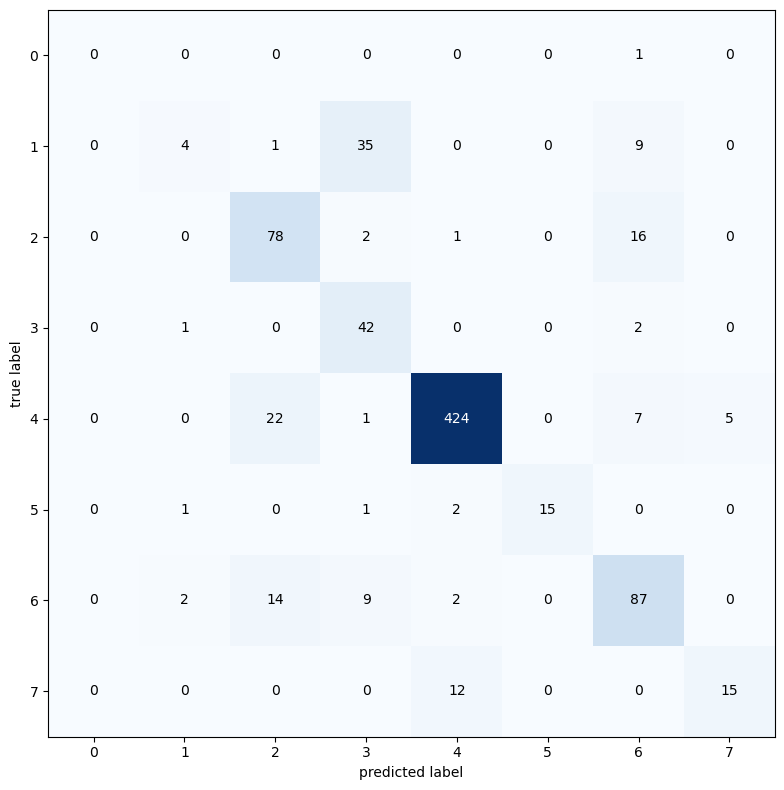

In [31]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

width_shape=300
height_shape=300

names=['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05','CLASS_06','CLASS_07','CLASS_08']
test_data_dir = 'C:\carne/test'

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape,height_shape),
    class_mode='categorical',
    shuffle=False)

custom_Model=load_model("modelo.h5py")
#custom_Model=modelo
predicciones=custom_Model.predict_generator(generator=test_generator)

y_pred=np.argmax(predicciones,axis=1)
y_real=test_generator.classes

matc=confusion_matrix(y_real,y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8),show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred,digits=4))

